# STROKE DATA ANALYSIS 

DESCRIPTION: THIS PROJECT AIMS TO HELP ANALYSE GIVEN SET OF DATA TO FIND OUT IF THERE ARE ANY VISIBLE PATTERNS IN PEOPLE HAVING STROKES. THE MAIN OBJECTIVE IS TO POINT OUT KEY HIGH RISK FACTORS OF STROKE THROUGH ANALYSIS OF GIVEN PATIENT DATA.

BUSINESS PROBLEM: A healthcare provider wants to improve patient care by early identifying individuals at high risk of strokes. By using patient data (age, hypertension, heart disease, BMI, etc.), they want to predict the likelihood of a stroke and visualize the risk segments across different demographics and regions using Python for data analysis and Power BI for business reporting and decision-making.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("stroke.csv")

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


# DATA EXPLORATION

CHECKING NUMBER OF ROMS AND COLUMNS IN THE DF.

In [4]:
df.shape

(43400, 12)

CHECKING COLUMNS DATATYPES.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


FROM THIS AND OBSERVING THE CSV FILE, WE CAN OBSERVE THAT ALL DATATYPES ARE CORRECT.

CHECKING STATISTICAL MEASURES ON THE DF.

In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


NOW, LET'S SEE IF DF HAS MISSING/NULLL VALUES OR NOT.

In [7]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

WE CAN SEE THAT 'BMI' AND 'SMOKING STATUS' HAS MULTIPLE NULL VALUES.

CHECKING FOR DUPLICATED RECORDS.

In [8]:
df.duplicated().sum()

0

THEIR ARE NO DUPLICATE RECORDS.

NOW, LET'S CHECK NUMBER OF UNIQUE VALUES AND THEIR VALUE COUNTS FOR ALL IMPORTANT COLUMNS.

In [10]:
print(df["gender"].nunique())
print(df["gender"].value_counts())

3
gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64


In [12]:
print(df["hypertension"].nunique())
print(df["hypertension"].value_counts())

2
hypertension
0    39339
1     4061
Name: count, dtype: int64


In [13]:
print(df["heart_disease"].nunique())
print(df["heart_disease"].value_counts())

2
heart_disease
0    41338
1     2062
Name: count, dtype: int64


In [14]:
print(df["ever_married"].nunique())
print(df["ever_married"].value_counts())

2
ever_married
Yes    27938
No     15462
Name: count, dtype: int64


In [15]:
print(df["work_type"].nunique())
print(df["work_type"].value_counts())

5
work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64


In [17]:
print(df["Residence_type"].nunique())
print(df["Residence_type"].value_counts())

2
Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64


In [20]:
print(df["smoking_status"].nunique())
print(df["smoking_status"].value_counts())

3
smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64


In [21]:
print(df["stroke"].nunique())
print(df["stroke"].value_counts())

2
stroke
0    42617
1      783
Name: count, dtype: int64


LET'S CHECK UNIQUE VALUES FOR SOME OF THE COLUMNS.

In [38]:
list(df["avg_glucose_level"].unique())

[95.12,
 87.96,
 110.89,
 69.04,
 161.28,
 210.95,
 77.59,
 243.53,
 77.67,
 205.84,
 77.08,
 57.08,
 162.96,
 73.5,
 95.04,
 85.37,
 84.62,
 82.67,
 57.33,
 67.84,
 75.7,
 129.54,
 60.22,
 198.21,
 109.82,
 60.84,
 94.61,
 97.49,
 206.72,
 214.45,
 82.9,
 103.26,
 55.78,
 73.74,
 149.75,
 82.34,
 62.6,
 94.09,
 55.42,
 82.18,
 117.92,
 114.84,
 79.17,
 110.63,
 190.7,
 79.81,
 113.63,
 141.24,
 56.96,
 203.04,
 94.3,
 81.51,
 137.74,
 81.84,
 242.3,
 102.64,
 146.01,
 75.42,
 220.49,
 61.45,
 88.19,
 115.22,
 97.93,
 228.69,
 85.6,
 79.83,
 218.46,
 62.2,
 69.15,
 127.71,
 216.7,
 71.89,
 103.56,
 79.03,
 69.94,
 90.12,
 95.1,
 234.58,
 235.85,
 78.05,
 89.44,
 202.21,
 111.38,
 243.5,
 182.2,
 229.92,
 82.24,
 89.84,
 90.69,
 84.38,
 215.6,
 91.61,
 138.16,
 75.23,
 75.18,
 106.23,
 239.64,
 58.95,
 99.92,
 116.23,
 118.82,
 66.3,
 101.41,
 200.28,
 136.8,
 96.57,
 66.42,
 98.09,
 205.23,
 86.78,
 126.82,
 78.4,
 63.69,
 209.58,
 89.86,
 110.99,
 83.82,
 137.96,
 210.78,
 118.89,
 72

In [37]:
list(df["age"].unique())

[3.0,
 58.0,
 8.0,
 70.0,
 14.0,
 47.0,
 52.0,
 75.0,
 32.0,
 74.0,
 79.0,
 37.0,
 40.0,
 35.0,
 20.0,
 42.0,
 44.0,
 65.0,
 57.0,
 49.0,
 71.0,
 59.0,
 25.0,
 67.0,
 38.0,
 54.0,
 27.0,
 23.0,
 55.0,
 17.0,
 13.0,
 4.0,
 16.0,
 22.0,
 45.0,
 66.0,
 69.0,
 53.0,
 78.0,
 43.0,
 51.0,
 30.0,
 46.0,
 61.0,
 48.0,
 29.0,
 11.0,
 76.0,
 21.0,
 18.0,
 33.0,
 82.0,
 24.0,
 34.0,
 64.0,
 68.0,
 60.0,
 36.0,
 39.0,
 0.64,
 72.0,
 41.0,
 56.0,
 0.88,
 5.0,
 80.0,
 26.0,
 31.0,
 7.0,
 12.0,
 63.0,
 62.0,
 2.0,
 81.0,
 9.0,
 15.0,
 28.0,
 10.0,
 77.0,
 1.8,
 0.32,
 1.08,
 73.0,
 50.0,
 19.0,
 6.0,
 1.16,
 1.0,
 1.4,
 1.72,
 0.24,
 1.64,
 1.56,
 0.72,
 1.88,
 1.24,
 0.8,
 0.4,
 0.08,
 1.48,
 0.56,
 0.48,
 1.32,
 0.16]

In [29]:
list(df["bmi"].unique())

[18.0,
 39.2,
 17.6,
 35.9,
 19.1,
 50.1,
 17.7,
 27.0,
 32.3,
 54.6,
 35.0,
 22.0,
 39.4,
 26.1,
 42.4,
 33.0,
 19.7,
 22.5,
 24.6,
 25.2,
 41.8,
 60.9,
 31.5,
 27.3,
 23.7,
 24.5,
 28.4,
 26.9,
 26.7,
 31.2,
 25.0,
 25.4,
 27.5,
 16.0,
 31.6,
 25.1,
 30.9,
 24.8,
 23.4,
 29.4,
 18.3,
 20.0,
 19.5,
 36.0,
 27.7,
 28.5,
 26.8,
 33.6,
 29.1,
 34.9,
 35.3,
 26.4,
 40.1,
 43.1,
 36.7,
 29.3,
 21.2,
 36.6,
 21.4,
 27.9,
 34.3,
 31.0,
 38.7,
 27.6,
 16.5,
 22.8,
 35.4,
 24.3,
 25.7,
 21.9,
 nan,
 38.4,
 30.5,
 25.9,
 54.7,
 29.9,
 18.6,
 27.1,
 24.9,
 19.4,
 29.0,
 48.2,
 34.6,
 25.8,
 27.2,
 20.7,
 30.0,
 37.3,
 34.1,
 23.6,
 39.5,
 23.5,
 23.3,
 64.8,
 28.1,
 24.4,
 29.8,
 35.1,
 43.6,
 21.0,
 47.3,
 16.6,
 37.5,
 24.2,
 21.6,
 31.1,
 15.5,
 20.5,
 35.6,
 16.7,
 41.9,
 16.4,
 17.1,
 29.2,
 37.9,
 32.5,
 44.6,
 33.2,
 22.3,
 39.6,
 37.8,
 40.3,
 41.5,
 41.6,
 23.8,
 39.0,
 23.2,
 18.9,
 36.1,
 36.3,
 40.5,
 46.5,
 16.8,
 46.6,
 26.2,
 35.2,
 20.9,
 36.8,
 34.4,
 22.2,
 13.8,
 31.7,
 34.2,


LET'S REPLACE 1 AND 0 IN 'STROKE' AND 'HYPERTENSION' COLUMN TO 'YES' AND 'NO'.

In [30]:
df["stroke"].replace({1:"Yes",0:"No"},inplace=True)

In [31]:
df["hypertension"].replace({1:"Yes",0:"No"},inplace=True)

In [34]:
df["heart_disease"].replace({1:"Yes",0:"No"},inplace=True)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  object 
 4   heart_disease      43400 non-null  object 
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 4.0+ MB


AS WE REPLACED 0'S AND 1'S TO YES AND NO, WE CAN SEE THAT NOW STROKE, HYPERTENSION AND HEART_DISEASE DATATYPE HAS CHANGED FROM INT TO OBJECT.

In [41]:
continous = ['age', 'avg_glucose_level', 'bmi']

categorical =['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

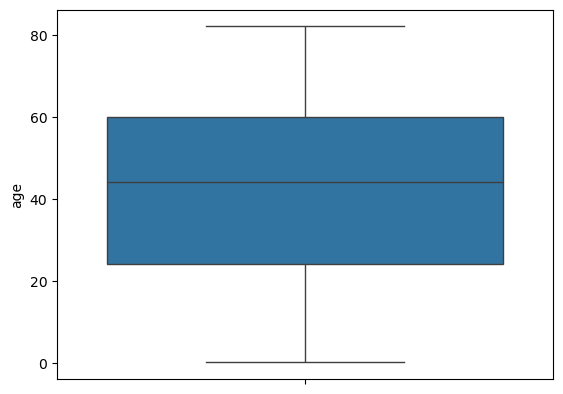

In [42]:
sns.boxplot(df["age"])
plt.show()

NO OUTLIERS IN AGE COLUMN.

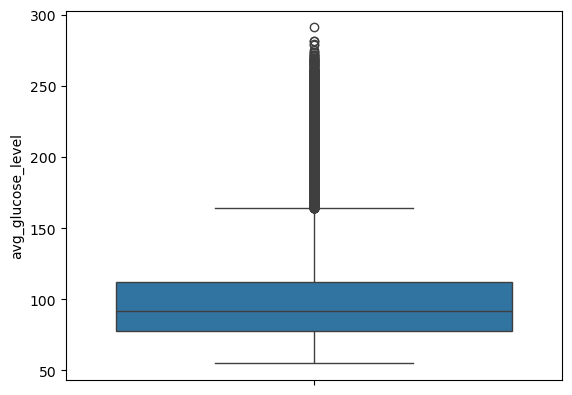

In [43]:
sns.boxplot(df["avg_glucose_level"])
plt.show()

OUTLIERS PRESENT IN AVERAGE GLUCOSE LEVEL COLUMN.

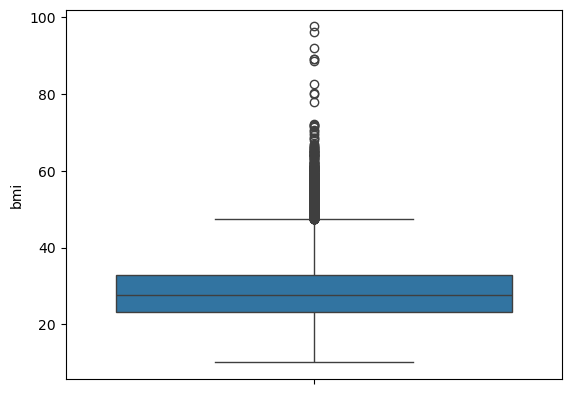

In [44]:
sns.boxplot(df["bmi"])
plt.show()

OUTLIERS PRESENT IN BMI COLUMN.

# DATA CLEANING

LET'S CLEAN OUR DF.

THERE ARE NO DUPLICATES AND WRONG DATA TYPES IN THE DATA.

WE HAVE ONE UNIMPORTANT COLUMN : 'ID'
WE WILL DROP THIS COLUMN BECAUSE IT'S OF NO USE AND REDUCE DIMENSION.

In [46]:
df = df.drop('id', axis=1)

'ID' COLUMN IS DROPPED.

In [47]:
df.isnull().sum()

gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

THERE ARE 2 COLUMNS WITH MISSING VALUES. 
TO  TREAT THEM WE HAVE TO REPLACE NULL VALUES WITH EITHER ORIGINAL VALUE OR STATISTICAL VALUES OR WE HAVE TO REMOVE THEM.

OUT OF 43400 RECORDS 1462 VALUES ARE MISSING IN BMI, SO WE'LL FILL THEM WITH MEDIAN BECAUSE THE DATA IN BMI COLUMN IS NOT NORMALLY DISTRIBUTED AND THEIR ARE MULTIPLE OUTLIERS.

AND FILLING NULL VALUES OF SMOKING_STATUS WITH UNKNOWN BECAUSE APPROXIMATELY 30% OF RECORDS ARE EMPTY.

In [49]:
df["bmi"].fillna(df["bmi"].median(), inplace=True)

In [50]:
df["smoking_status"].fillna("Unknown", inplace=True)

FROM THE BOXPLOTS WE CAN OBSERVE THAT, AGE COLUMN DOES NOT HAVE ANY OUTLIERS ON THE OTHER HAND AVERAGE GLUCOSE LEVEL AND BMI COLUMNS HAVE MANY OUTLIERS.

WE CANNOT REPLACE OR REMOVE THEM BECAUSE THEY ARE ORIGINAL VALUES. SO, WE'LL USE THEM AS IT IS.

In [5]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [53]:
df.to_excel("cleaned_data_stroke.xlsx", index=False)